# Life Expectency Project Using LinearRegression

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

#

* Importing Dataset 

In [15]:
life = pd.read_csv("C:/Users/Harsha Vardhan/Downloads/Cleaned-Life-Exp.csv")

In [16]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,-0.459399,-0.443691,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,Afghanistan,1.404986,-0.459399,-0.979279,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,Afghanistan,1.188210,-0.459399,-0.979279,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,Afghanistan,0.971434,-0.459399,-1.021286,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,Afghanistan,0.754658,-0.459399,-1.052791,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275


In [20]:
life.shape

(2938, 22)

In [21]:
life.describe()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2.938000e+03,2938.000000,...,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2.369453e-14,1.233413e-16,0.000128,-0.000375,0.000000,-0.019624,5.320606e-17,-0.107042,2.902149e-17,-0.012049,...,-0.005423,-0.002649,-0.005636,-9.673829e-18,-0.058679,-0.010227,0.008753,0.008346,-0.009392,-0.004486
std,1.000170e+00,1.000170e+00,0.999561,0.998839,1.000170,0.985558,1.000170e+00,1.007555,1.000170e+00,1.002242,...,1.000026,0.967425,1.000254,1.000170e+00,0.932894,0.885175,0.998222,0.997877,1.002607,1.008433
min,-1.629878e+00,-4.593985e-01,-3.457687,-1.318060,-0.257017,-1.767049,-3.714329e-01,-3.189357,-2.110357e-01,-1.862284,...,-3.396093,-2.229185,-3.387365,-3.234448e-01,-0.827823,-0.479363,-1.072469,-1.058164,-2.976073,-3.571075
25%,-7.627743e-01,-4.593985e-01,-0.643224,-0.730634,-0.257017,-0.899100,-3.690756e-01,-0.396359,-2.110357e-01,-0.957869,...,-0.236944,-0.631817,-0.182352,-3.234448e-01,-0.492302,-0.203358,-0.733059,-0.725430,-0.661801,-0.593391
50%,1.043299e-01,-4.593985e-01,0.301932,-0.167348,-0.231573,-0.240113,-3.387736e-01,0.311926,-2.095530e-01,0.233464,...,0.446115,-0.067333,0.450217,-3.234448e-01,-0.393025,-0.162123,-0.325767,-0.326150,0.225020,0.091477
75%,9.714341e-01,-4.593985e-01,0.677369,0.506583,-0.070428,0.729856,-1.492859e-01,0.600825,-1.796149e-01,0.887138,...,0.616880,0.585225,0.618901,-1.855659e-01,-0.164617,-0.046133,0.547126,0.538959,0.722968,0.687013
max,1.621762e+00,2.176759e+00,2.076724,4.491830,15.009326,3.274483,9.429403e+00,0.804604,1.829547e+01,2.443979,...,0.702262,4.668722,0.703244,9.623530e+00,7.828360,21.002167,5.172675,5.263781,1.704457,2.592731


In [22]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,1.621762,-0.459399,-0.443691,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,...,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,Afghanistan,1.404986,-0.459399,-0.979279,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,...,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,Afghanistan,1.188210,-0.459399,-0.979279,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,...,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,Afghanistan,0.971434,-0.459399,-1.021286,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,...,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,Afghanistan,0.754658,-0.459399,-1.052791,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,...,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275


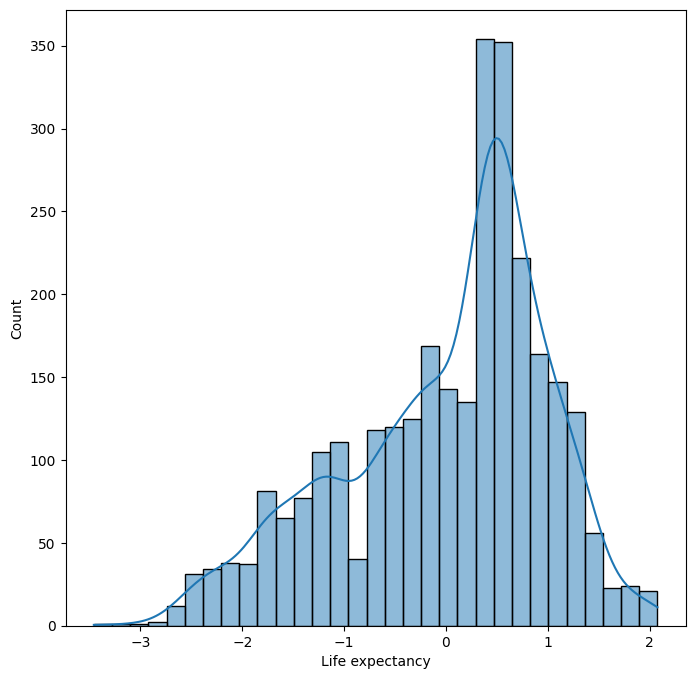

In [24]:
# to visualize the data
plt.figure(figsize=(8,8))
sns.histplot(life["Life expectancy"],kde=True)
plt.show()

In [26]:
# split the data
x = life.drop(["Country","Year","Life expectancy"],axis=1)

In [27]:
y=life["Life expectancy"]

In [28]:
x.head()

,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,-0.459399,0.790238,0.268824,-1.133571,-0.335570,-0.635971,-0.110384,-0.959116,0.255359,-3.268019,0.889486,-0.730578,-0.323445,-0.483546,0.343993,2.796805,2.757185,-0.704483,-0.563614
1,-0.459399,0.854614,0.285786,-1.133571,-0.334441,-0.755661,-0.168124,-0.984066,0.274060,-1.048077,0.897493,-0.857092,-0.323445,-0.481553,-0.203706,2.864687,2.801550,-0.718710,-0.593391
2,-0.459399,0.830473,0.302749,-1.133571,-0.334594,-0.675868,-0.173531,-1.009015,0.292761,-0.877312,0.877476,-0.772749,-0.323445,-0.480218,0.311126,2.909942,2.845914,-0.747164,-0.623168
3,-0.459399,0.862660,0.328193,-1.133571,-0.332096,-0.556178,0.032045,-1.033964,0.317696,-0.663856,1.033609,-0.646235,-0.323445,-0.477539,-0.148469,2.955197,2.912461,-0.780360,-0.652944
4,-0.459399,0.886801,0.345155,-1.133571,-0.367862,-0.516281,0.051757,-1.053924,0.342631,-0.621165,0.773387,-0.604064,-0.323445,-0.520044,-0.160246,3.023079,2.956826,-0.823042,-0.742275


In [29]:
y.head()

0   -0.443691
1   -0.979279
2   -0.979279
3   -1.021286
4   -1.052791
Name: Life expectancy, dtype: float64

In [63]:
# train test split data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
x_train.shape

(2350, 19)

In [65]:
x_test.shape

(588, 19)

In [66]:
y_train.shape

(2350,)

In [67]:
y_test.shape

(588,)

In [68]:
# training the model

In [69]:
model = LinearRegression()

In [70]:
model.fit(x_train,y_train)

LinearRegression()

In [71]:
pred = model.predict(x_test)

In [72]:
pred

array([-1.07239598e-01,  7.56173665e-01,  5.38475618e-01,  9.43039246e-01,
       -2.20314838e+00, -1.92254426e+00, -2.02754809e-01,  2.38655473e-01,
        5.84834253e-01, -1.44976641e+00, -1.72109801e+00, -9.84176578e-01,
       -4.80207648e-01,  1.57808186e-01,  2.02963893e-01, -6.82602190e-01,
       -1.35922899e+00,  1.21540524e+00, -6.76314077e-02,  1.34896672e+00,
        1.27374891e+00,  1.60862122e+00,  1.36476962e-01, -6.91316347e-02,
        1.43522561e-01, -6.21899895e-02, -8.47475600e-01, -8.46350170e-01,
        1.07537886e+00,  2.24373190e-01, -2.80343725e-01,  5.78589869e-01,
       -2.17134691e-01, -8.25303179e-02,  1.13698828e+00, -1.34317810e+00,
       -2.59801989e-01,  4.10353875e-01, -7.34964997e-01,  7.39912654e-01,
       -1.13594021e+00, -4.73663919e-01,  6.36628249e-01,  1.39062480e+00,
        7.25764646e-01, -1.25467287e+00,  1.02327617e+00,  1.47092049e-01,
       -4.18046617e-01, -1.78797906e-01, -1.61632544e+00, -8.30333089e-01,
        9.49861789e-01,  

In [73]:
model.score(x_test,y_test)

0.8441502346462053

In [81]:
from sklearn.metrics import mean_squared_error,r2_score

In [82]:
mse = mean_squared_error(y_test,pred)
r2 = r2_score(y_test,pred)

In [83]:
print("mean_squared_error:",mse)
print("r2_score:",r2)

mean_squared_error: 0.14973001678141154
r2_score: 0.8441502346462053
